## 03 - Bessel Functions jl and nl

The standard scipy package is already equipped with an optimized way to evaluate an arbitrary Bessel function.
- [scipy.special.spherical_jn](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.spherical_jn.html#scipy.special.spherical_jn) 
- [scipy.special.spherical_yn](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.spherical_yn.html#scipy.special.spherical_yn)

In this notebook we are going to test whether the scipy implementation is the one we are looking for and try to quantify how faster it is with respect to our implementation.

As a further source of comparison we plot the analytical value found on wikipedia [Wikipedia](!https://en.wikipedia.org/wiki/Bessel_function#Spherical_Bessel_functions:_jn,_yn).

The assignment given is the following:
![](https://i.ibb.co/XxnD8CM/Screenshot-163.png)

In [1]:
# library import
from scipy.special import spherical_jn as jn
from scipy.special import spherical_yn as yn

import numpy as np

import matplotlib.pyplot as plt

Here we define the function as required by the assignment:

In [27]:
def j(l, x):
    if l == -1:
        return np.cos(x) / x
    elif l == 0:
        return np.sin(x) / x
    else:
        return (2*(l-1)+1)/x * j(l-1, x) - j(l-2, x)
    
def n(l, x):
    if l == -1:
        return np.sin(x) / x
    elif l == 0:
        return -1*np.cos(x) / x
    else:
        return (2*(l-1)+1)/x*n(l-1, x) - n(l-2, x)

Now we proceed by plotting the first three spherical harmonics. The first plot is our definition of the functions, the second is scipy's implementation while the third plot is the analytical solution. 

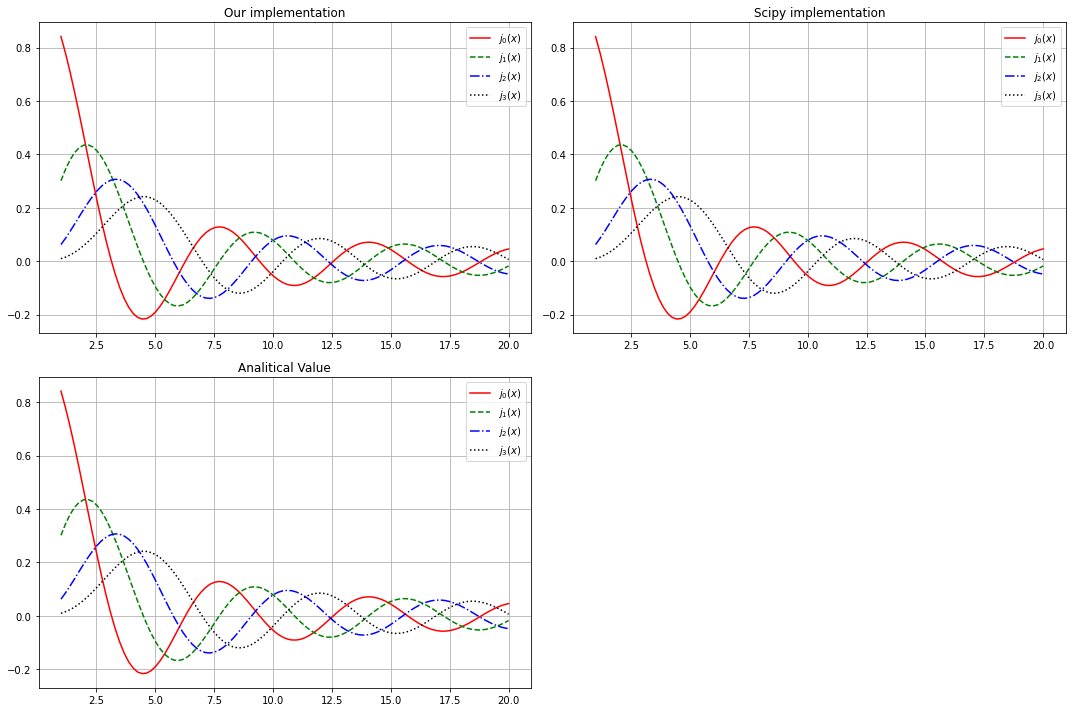

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

x = np.linspace(1, 20, num=100, endpoint=True)

ax[0][0].plot(x, j(0, x), label=r"$j_0(x)$", color="r")
ax[0][0].plot(x, j(1, x), label=r"$j_1(x)$", color="g", linestyle='dashed')
ax[0][0].plot(x, j(2, x), label=r"$j_2(x)$", color="b", linestyle='dashdot')
ax[0][0].plot(x, j(3, x), label=r"$j_3(x)$", color="k", linestyle='dotted')
ax[0][0].set_title("Our implementation")
ax[0][0].grid()
ax[0][0].legend()

ax[0][1].plot(x, jn(0, x), label=r"$j_0(x)$", color="r")
ax[0][1].plot(x, jn(1, x), label=r"$j_1(x)$", color="g", linestyle='dashed')
ax[0][1].plot(x, jn(2, x), label=r"$j_2(x)$", color="b", linestyle='dashdot')
ax[0][1].plot(x, jn(3, x), label=r"$j_3(x)$", color="k", linestyle='dotted')
ax[0][1].set_title("Scipy implementation")
ax[0][1].grid()
ax[0][1].legend()

ax[1][0].plot(x, np.sin(x)/x, label=r"$j_0(x)$", color="r")
ax[1][0].plot(x, np.sin(x)/np.power(x,2)-np.cos(x)/x, label=r"$j_1(x)$",
              color="g", linestyle='dashed')
ax[1][0].plot(x, (3/np.power(x, 2) -1)*np.sin(x)/x - 3*np.cos(x)/np.power(x, 2),
              label=r"$j_2(x)$", color="b", linestyle='dashdot')
ax[1][0].plot(x, (15/np.power(x, 3) -6/x)*np.sin(x)/x - (15/np.power(x, 2)-1)*np.cos(x)/x,
              label=r"$j_3(x)$", color="k", linestyle='dotted')
ax[1][0].set_title("Analitical Value")
ax[1][0].grid()
ax[1][0].legend()

ax[1][1].set_visible(False)

plt.tight_layout()

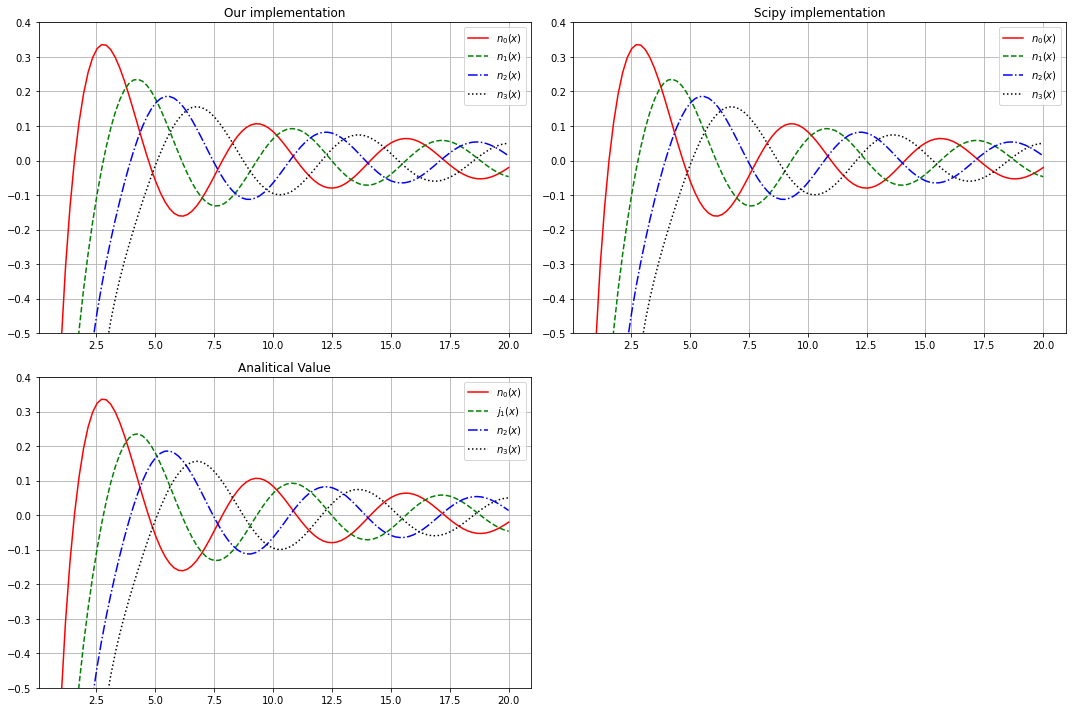

In [53]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

x = np.linspace(1, 20, num=100, endpoint=True)

ax[0][0].plot(x, n(0, x), label=r"$n_0(x)$", color="r")
ax[0][0].plot(x, n(1, x), label=r"$n_1(x)$", color="g", linestyle='dashed')
ax[0][0].plot(x, n(2, x), label=r"$n_2(x)$", color="b", linestyle='dashdot')
ax[0][0].plot(x, n(3, x), label=r"$n_3(x)$", color="k", linestyle='dotted')
ax[0][0].set_ylim([-0.5, 0.4])
ax[0][0].set_title("Our implementation")
ax[0][0].grid()
ax[0][0].legend()

ax[0][1].plot(x, yn(0, x), label=r"$n_0(x)$", color="r")
ax[0][1].plot(x, yn(1, x), label=r"$n_1(x)$", color="g", linestyle='dashed')
ax[0][1].plot(x, yn(2, x), label=r"$n_2(x)$", color="b", linestyle='dashdot')
ax[0][1].plot(x, yn(3, x), label=r"$n_3(x)$", color="k", linestyle='dotted')
ax[0][1].set_ylim([-0.5, 0.4])
ax[0][1].set_title("Scipy implementation")
ax[0][1].grid()
ax[0][1].legend()

ax[1][0].plot(x, -np.cos(x)/x, label=r"$n_0(x)$", color="r")
ax[1][0].plot(x, -np.cos(x)/np.power(x,2)-np.sin(x)/x, label=r"$j_1(x)$",
              color="g", linestyle='dashed')
ax[1][0].plot(x, -(3/np.power(x, 2) -1)*np.cos(x)/x - 3*np.sin(x)/np.power(x, 2),
              label=r"$n_2(x)$", color="b", linestyle='dashdot')
ax[1][0].plot(x, -(15/np.power(x, 3) -6/x)*np.cos(x)/x - (15/np.power(x, 2)-1)*np.sin(x)/x,
              label=r"$n_3(x)$", color="k", linestyle='dotted')
ax[1][0].set_ylim([-0.5, 0.4])
ax[1][0].set_title("Analitical Value")
ax[1][0].grid()
ax[1][0].legend()

ax[1][1].set_visible(False)

plt.tight_layout()

Finally, we now proceed in timing the two implementation in order to see which one is faster. We choose a spherical function of order 5 because we consider it an order high enough to highlight potential speed differences.

In [55]:
print("j(10, x):\t", end="")
%timeit j(10, x)
  
print("\njn(10, x):\t", end="")
%timeit jn(10, x)

print("\nn(10, x):\t", end="")
%timeit n(10, x)

print("\nyn(10, x):\t", end="")
%timeit yn(10, x)

j(10, x):	582 µs ± 26.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

jn(10, x):	42.6 µs ± 1.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

n(10, x):	630 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

yn(10, x):	8.7 µs ± 234 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


It's possible to notice that, according to the function _timeit_ scipy's implementation is at least an order of magnitude faster than our implementation. We then resolve to use scipy's implementation instead of our own.